In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk #spacy
import re #removing the special characters
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kusur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('mental_health.csv')
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [5]:
df.shape

(27977, 2)

In [6]:
df.dtypes

text     object
label     int64
dtype: object

In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df.duplicated().sum()

5

In [9]:
df = df.drop_duplicates()
print('Number of Duplicates: ', len(df[df.duplicated()]))

Number of Duplicates:  0


In [10]:
df['label'].value_counts()

label
0    14134
1    13838
Name: count, dtype: int64

In [11]:
df.describe(include='all')

,text,label
count,27972,27972.000000
unique,27972,NaN
top,dear american teens question dutch person hear...,NaN
freq,1,NaN
mean,NaN,0.494709
std,NaN,0.499981
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


([<matplotlib.patches.Wedge at 0x2c11bb73e30>,
 [Text(-0.6929627276044373, -0.8542848811438832, '0'),
  Text(0.7244611170241917, 0.8931159442760277, '1')],
 [Text(-0.3779796696024203, -0.46597357153302715, '50.5%'),
  Text(0.4094780226658475, 0.5048046641560157, '49.5%')])

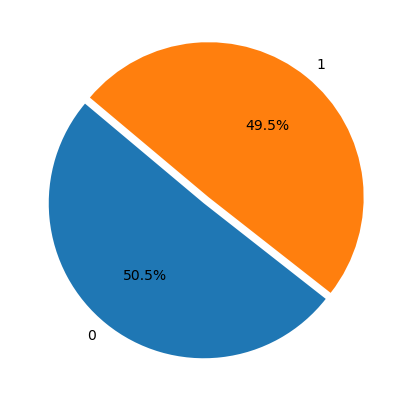

In [12]:
plt.figure(figsize=(5,6))
plt.pie(df['label'].value_counts(),labels = df['label'].value_counts().index,autopct='%1.1f%%',explode=[0, 0.05],startangle=140)

In [13]:
def remove_stopwords(sentence):
    #list of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", 
                 "are", "as", "at", "be", "because", "been", "before", "being", "below", "between",
                 "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each",
                 "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll",
                 "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's",
                 "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself",
                 "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", 
                 "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she",
                 "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's",
                 "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these",
                 "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to",
                 "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've",
                 "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who",
                 "who's" "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're",
                 "you've", "your", "yours", "yourself", "yourselves"]

    #Sentence converted to lower case only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [14]:
# pd.options.mode.copy_on_write = True
df['text1'] = (df['text'].apply(remove_stopwords))
df

C:\Users\kusur\AppData\Local\Temp\ipykernel_13668\3521422308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text1'] = (df['text'].apply(remove_stopwords))


,text,label,text1
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...
...,...,...,...
27972,posting everyday people stop caring religion ...,0,posting everyday people stop caring religion m...
27973,okay definetly need hear guys opinion ive pret...,0,okay definetly need hear guys opinion ive pret...
27974,cant get dog think ill kill myselfthe last thi...,1,cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...,1,whats point princess bridei really think like ...


In [15]:
msg = df['text1'].str.replace('[^a-zA-Z0-9 ]+'," ", regex = True)
msg

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried year old girl subject domestic physica...
                               ...                        
27972    posting everyday people stop caring religion m...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat ok ...
Name: text1, Length: 27972, dtype: object

In [16]:
lemmatizer = WordNetLemmatizer()
data = []

In [17]:
import nltk
nltk.download('wordnet')

def preprocess_text(text):

    #tokenize the text
    tokens = word_tokenize(text)

    #Filter tokens with length greater than 2
    filtered_tokens = [ token for token in tokens if len(token) > 3]

    #Stem each token 
    lemmed_tokens = [lemmatizer.lemmatize(token.lower()) for token in filtered_tokens]

    #Join stemmed tokens into a single string
    preprocessed_text = " ".join(lemmed_tokens)

    return preprocessed_text

#Apply text preprocessing to each row of the Dataframe
df['preprocessed_text'] = msg.apply(preprocess_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kusur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\kusur\AppData\Local\Temp\ipykernel_13668\264036439.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = msg.apply(preprocess_text)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
data_vec = tf.fit_transform(df['preprocessed_text'])
print(data_vec)


  (0, 35255)	0.21805636791047633
  (0, 48216)	0.11455966748601445
  (0, 33204)	0.07123588556785876
  (0, 23766)	0.32202234022472354
  (0, 57707)	0.36934655986537956
  (0, 53107)	0.33362148721649937
  (0, 32593)	0.38735609571127644
  (0, 57230)	0.09361828650239136
  (0, 16873)	0.19328952859648735
  (0, 24597)	0.28870085668457957
  (0, 25575)	0.18102028820757218
  (0, 42614)	0.12343473078158108
  (0, 16698)	0.3002471227558296
  (0, 45622)	0.16067665532475164
  (0, 56491)	0.1972669310104924
  (0, 1994)	0.19994961562382382
  (0, 13402)	0.24587057645074326
  (1, 25004)	0.2873925061906826
  (1, 62328)	0.12651668698274063
  (1, 34675)	0.15353781963514543
  (1, 38799)	0.23339466020132368
  (1, 20098)	0.136135862235505
  (1, 23404)	0.31643686919479724
  (1, 31425)	0.3897060157687242
  (1, 46442)	0.20362226046092885
  :	:
  (27970, 33204)	0.1345091865155537
  (27971, 64552)	0.2786093184296345
  (27971, 9308)	0.2221645021076324
  (27971, 39701)	0.4283972918092418
  (27971, 52538)	0.19033420344605

In [19]:
df['text_length'] = df['preprocessed_text'].apply(lambda x: len(str(x).split()))

C:\Users\kusur\AppData\Local\Temp\ipykernel_13668\1379239828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['preprocessed_text'].apply(lambda x: len(str(x).split()))


In [20]:
df = df.drop(['text','text1'],axis=1)

In [21]:
df.head()

,label,preprocessed_text,text_length
0,0,dear american teen question dutch person heard...,19
1,1,nothing look forward lifei dont many reason ke...,18
2,0,music recommendation looking expand playlist u...,48
3,1,done trying feel betterthe reason still alive ...,79
4,1,worried year girl subject domestic physicalmen...,269


In [22]:
y = df['label'].values
y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_vec, y, test_size=0.3, random_state=1)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4271
           1       0.93      0.88      0.91      4121

    accuracy                           0.91      8392
   macro avg       0.91      0.91      0.91      8392
weighted avg       0.91      0.91      0.91      8392



In [25]:
sv_acc = accuracy_score(y_test,y_pred)
sv_acc

0.9101525262154433

In [26]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)
y_pred = Dt.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4271
           1       0.82      0.80      0.81      4121

    accuracy                           0.81      8392
   macro avg       0.81      0.81      0.81      8392
weighted avg       0.81      0.81      0.81      8392

0.8129170638703527


In [27]:
dt_acc = accuracy_score(y_test,y_pred)
dt_acc

0.8129170638703527

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4271
           1       0.90      0.87      0.88      4121

    accuracy                           0.89      8392
   macro avg       0.89      0.89      0.89      8392
weighted avg       0.89      0.89      0.89      8392

0.8887035271687321


In [29]:
Rf_acc = accuracy_score(y_test,y_pred)
Rf_acc

0.8887035271687321

In [30]:
from sklearn.ensemble import AdaBoostClassifier
# clf = AdaBoostClassifier(algorithm='SAMME')

ab = AdaBoostClassifier(algorithm='SAMME')
ab.fit(x_train,y_train)
y_pred = ab.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4271
           1       0.87      0.76      0.81      4121

    accuracy                           0.83      8392
   macro avg       0.83      0.83      0.83      8392
weighted avg       0.83      0.83      0.83      8392

0.8286463298379408


In [31]:
ab_acc = accuracy_score(y_test,y_pred)
ab_acc

0.8286463298379408

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4271
           1       0.90      0.81      0.85      4121

    accuracy                           0.86      8392
   macro avg       0.87      0.86      0.86      8392
weighted avg       0.87      0.86      0.86      8392

0.8616539561487131


In [33]:
gb_acc = accuracy_score(y_test,y_pred)
gb_acc

0.8616539561487131

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4271
           1       0.93      0.88      0.90      4121

    accuracy                           0.91      8392
   macro avg       0.91      0.91      0.91      8392
weighted avg       0.91      0.91      0.91      8392

0.907650142993327


In [35]:
lr_acc = accuracy_score(y_test,y_pred)
lr_acc

0.907650142993327

In [36]:
model = pd.DataFrame({'Model':['Support Vector Machine','Decision Tree','RandomForest','AdaBoost','GradientBoosting','Logistic Regression'],
                     'Score':[sv_acc,dt_acc,Rf_acc,ab_acc,gb_acc,lr_acc],
                     })
model

,Model,Score
0,Support Vector Machine,0.910153
1,Decision Tree,0.812917
2,RandomForest,0.888704
3,AdaBoost,0.828646
4,GradientBoosting,0.861654
5,Logistic Regression,0.907650


In [37]:
y_new = sv.predict(tf.transform(["I'm overwhelmed with anxiety about the future."]))
# y_new[0]
if y_new == 1:
    print("Positive")
if y_new == 0:
    print("Negative")

Negative


In [38]:
y_new = sv.predict(tf.transform(["I had a great time with friends last night."]))
if y_new == 1:
    print("Positive")
if y_new == 0:
    print("Negative")

Negative


In [42]:
import pickle
import warnings

pickle.dump(sv,open("model.pkl","wb"))

In [46]:
import joblib
joblib.dump(tf,'tf.pkl')

['tf.pkl']